In [3]:
#Importamos las librerias a utilizar
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Importar librerías necesarias
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.impute import KNNImputer
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, roc_auc_score, accuracy_score, confusion_matrix
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import 

Cargo dataset de Fraudes financieros

In [4]:
df_fraud = pd.read_csv ("C:/Users/maria/Downloads/fraud_detection_dataset.csv", sep=",")

**Exploracion de datos**

In [5]:
df_fraud.sample(10)

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
4589407,328,CASH_IN,168287.06,C91026896,1223809.43,1392096.49,C1759260321,547257.40,378970.34,0,0
2337899,189,CASH_OUT,129654.09,C639643188,0.00,0.00,C1281282226,3927204.40,4056858.49,0,0
1136043,131,CASH_OUT,85710.48,C260381883,54078.00,0.00,C955352041,2663904.19,2749614.67,0,0
149991,12,TRANSFER,549708.37,C356675652,0.00,0.00,C1346067945,1001176.50,1550884.87,0,0
5859138,402,CASH_OUT,142187.27,C962902534,246368.00,104180.73,C1845869240,1910507.09,1973801.49,0,0
4018142,299,CASH_OUT,326908.93,C1810048573,0.00,0.00,C88509640,700726.42,1027635.35,0,0
583737,33,PAYMENT,26750.88,C1408053809,58626.80,31875.91,M328992798,0.00,0.00,0,0
4444663,323,CASH_OUT,281359.00,C212539798,0.00,0.00,C576951875,704468.03,985827.03,0,0
2897799,228,CASH_IN,31629.47,C1615052514,6141960.18,6173589.65,C1173083566,905985.34,874355.88,0,0
5096111,355,CASH_OUT,52030.17,C751761887,0.00,0.00,C878512133,2992327.27,3044357.44,0,0


In [6]:
df_fraud.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0,0
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1,0
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0,0


analisamos la cantidad de filas y columnas de nuestro dataset

In [7]:
print(df_fraud.shape)

(6362620, 11)


visualizamos los tipos de datos en cada columna

In [8]:
df_fraud.dtypes

step                int64
type               object
amount            float64
nameOrig           object
oldbalanceOrg     float64
newbalanceOrig    float64
nameDest           object
oldbalanceDest    float64
newbalanceDest    float64
isFraud             int64
isFlaggedFraud      int64
dtype: object

aislo columnas que no voy a utilizar

In [9]:
df_fraud = df_fraud.drop("type", axis = 1)

In [10]:
df_fraud = df_fraud.drop("nameOrig", axis = 1)

In [11]:
df_fraude = df_fraud.drop("nameDest", axis = 1)

vemos como se compone en nuevo dataset

In [12]:
df_fraude.head()

,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,9839.64,170136.0,160296.36,0.0,0.0,0,0
1,1,1864.28,21249.0,19384.72,0.0,0.0,0,0
2,1,181.00,181.0,0.00,0.0,0.0,1,0
3,1,181.00,181.0,0.00,21182.0,0.0,1,0
4,1,11668.14,41554.0,29885.86,0.0,0.0,0,0


entrenamiento del modelo con Random Forest

In [13]:
X = df_fraude.drop("isFraud", axis = 1)
y = df_fraude["isFraud"]

importamos las librerias necesarias
30% test y 70% para train

In [14]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.30, random_state=00000)

In [15]:
from sklearn.ensemble import RandomForestClassifier

#creación del modelo

random_forest = RandomForestClassifier(n_estimators=10, random_state=00000 )

In [16]:
random_forest.fit(X_train,y_train)

RandomForestClassifier(n_estimators=10, random_state=0)

Predicciones en train y en test

In [17]:
y_train_pred = random_forest.predict(X_train)
y_test_pred = random_forest.predict(X_test)

Evaluacion de las metricas del modelo

In [18]:
from sklearn.metrics import accuracy_score

train_accuracy = accuracy_score(y_train, y_train_pred)
test_accuracy = accuracy_score(y_test, y_test_pred)
print('el accuracy en train es:', train_accuracy)
print('el accuracy en test es:', test_accuracy)

el accuracy en train es: 0.9999337649315174
el accuracy en test es: 0.9995887438403257


En conjunto, estos resultados indican que:

El modelo tiene un rendimiento excelente tanto en los datos de entrenamiento como en los de prueba. Esto es un buen indicio de que el modelo no está sobreajustado (overfitted) ni subajustado (underfitted).
El alto accuracy en ambos conjuntos sugiere que el modelo tiene una capacidad de generalización muy buena y puede ser confiable para predecir resultados correctos en datos nuevos que no se han utilizado en el entrenamiento.
En resumen, tener valores de accuracy tan altos en ambos conjuntos implica que el modelo está funcionando extremadamente bien.

Verificacion de Features

In [19]:
feature_importances_df = pd.DataFrame(
    {"feature": list(X.columns), "importance": random_forest.feature_importances_}).sort_values("importance", ascending = False)
#mostramos la importancia de cada columna
feature_importances_df

,feature,importance
2,oldbalanceOrg,0.389851
5,newbalanceDest,0.197920
1,amount,0.165725
0,step,0.126357
3,newbalanceOrig,0.068161
4,oldbalanceDest,0.051189
6,isFlaggedFraud,0.000797


(array([0, 1, 2, 3, 4, 5, 6]),
 [Text(0, 0, 'oldbalanceOrg'),
  Text(1, 0, 'newbalanceDest'),
  Text(2, 0, 'amount'),
  Text(3, 0, 'step'),
  Text(4, 0, 'newbalanceOrig'),
  Text(5, 0, 'oldbalanceDest'),
  Text(6, 0, 'isFlaggedFraud')])

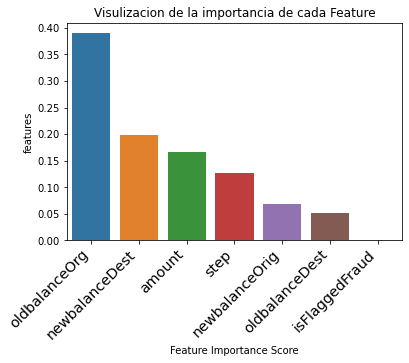

In [20]:
#Graficamos la importancia de cada columna para entender mejor estos datos
import seaborn as sns
import matplotlib.pyplot as plt

sns.barplot(x=feature_importances_df.feature, y=feature_importances_df.importance)
plt.xlabel("Feature Importance Score")
plt.ylabel("features")
plt.title("Visulizacion de la importancia de cada Feature")
plt.xticks(rotation=45, horizontalalignment="right", fontweight="light", fontsize="x-large")


Como vemos, la importancia de las características te permite entender qué variables están influyendo más en las predicciones de tu modelo. En este caso, "oldbalanceOrg" y "newbalanceDest" son las características más influyentes, mientras que "isFlaggedFraud" tiene una influencia prácticamente insignificante en las predicciones del modelo. Esta información puede ser útil para interpretar el modelo y tomar decisiones sobre qué características podrían necesitar más atención o ser mejoradas en futuras iteraciones del modelo.

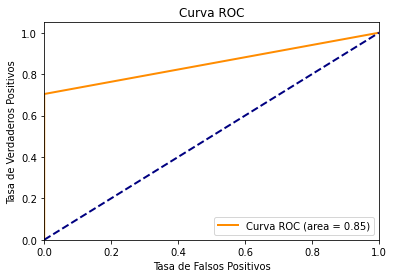

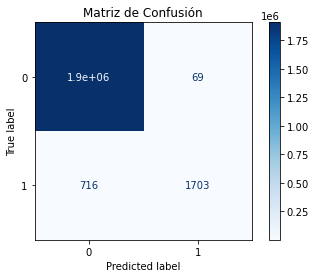

In [25]:
from sklearn.metrics import roc_curve, auc, confusion_matrix, ConfusionMatrixDisplay
fpr, tpr, _ = roc_curve(y_test, y_test_pred)
roc_auc = auc(fpr, tpr)
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='Curva ROC (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Tasa de Falsos Positivos')
plt.ylabel('Tasa de Verdaderos Positivos')
plt.title('Curva ROC')
plt.legend(loc="lower right")
plt.show()

# Calcular la matriz de confusión
cm = confusion_matrix(y_test, y_test_pred)

# Mostrar la matriz de confusión
fig, ax = plt.subplots()
cmap = plt.cm.Blues  # Puedes probar con diferentes cmap para colores suaves, como 'Blues', 'Greens', etc.
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap=cmap, ax=ax)
plt.title('Matriz de Confusión')
plt.show()


Interpretación de la matriz de confusión:
Verdaderos Negativos (TN): 1,900,000

Esto significa que el modelo ha predicho correctamente 1,900,000 instancias negativas como negativas.
Falsos Positivos (FP): 69

Esto significa que el modelo ha predicho incorrectamente 69 instancias negativas como positivas.
Falsos Negativos (FN): 716

Esto significa que el modelo ha predicho incorrectamente 716 instancias positivas como negativas.
Verdaderos Positivos (TP): 1,703

Esto significa que el modelo ha predicho correctamente 1,703 instancias positivas como positivas.




 Sensibilidad o Tasa de Verdaderos Positivos (TPR) ≈ 0.704
La sensibilidad indica qué proporción de las verdaderas instancias positivas fueron identificadas correctamente por el modelo.

Especificidad (Specificity) o Tasa de Verdaderos Negativos (TNR) ≈ 0.99996

Puntuación F1 (F1 Score) ≈ 0.812
es la media armónica de la precisión y la sensibilidad, y proporciona un equilibrio entre ambas.

Conclusión:
El modelo muestra un alto rendimiento general con una precisión cercana al 99.96%. Sin embargo, la sensibilidad de aproximadamente 70.4% sugiere que el modelo tiene un margen de mejora en la identificación de instancias positivas. La precisión positiva es alta (96.1%), lo que indica que la mayoría de las predicciones positivas son correctas. La especificidad es extremadamente alta (99.996%), lo que sugiere que el modelo es muy efectivo para identificar instancias negativas. La puntuación F1 es de 81.2%, reflejando un buen equilibrio entre precisión y sensibilidad.